In [448]:
import artm

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm

sns.set(style="darkgrid", palette="Set2")

from topicnet.dataset_manager import api

# topicnet imports
from topicnet.cooking_machine.cubes import (
    CubeCreator,
    GreedyStrategy,
    PerplexityStrategy,
    RegularizationControllerCube,
    RegularizersModifierCube,
)
from topicnet.cooking_machine.dataset import Dataset
from topicnet.cooking_machine.experiment import Experiment
from topicnet.cooking_machine.models import BaseScore
from topicnet.cooking_machine.models.topic_model import TopicModel
from topicnet.cooking_machine.model_constructor import add_standard_scores
from topicnet.cooking_machine.model_constructor import init_simple_default_model
from topicnet.cooking_machine.pretty_output import make_notebook_pretty
from topicnet.viewers.top_documents_viewer import TopDocumentsViewer
from topicnet.viewers.top_tokens_viewer import TopTokensViewer

In [2]:
EXPERIMENT_PATH = './data/exp/'

DATASET_PATH = './data/20_News_dataset/train_preprocessed.csv'

### Building topic model

In [3]:
if not os.path.exists(EXPERIMENT_PATH):
    os.mkdir(EXPERIMENT_PATH)
else:
    ! rm -rf $EXPERIMENT_PATH
    os.mkdir(EXPERIMENT_PATH)

In [4]:
%%time

from topicnet.cooking_machine.recipes import BaselineRecipe

training_pipeline = BaselineRecipe()

training_pipeline.format_recipe(
    dataset_path=DATASET_PATH,
    topic_number=10,
    background_topic_number=1,
    modality_list=['@lemmatized']
);


CPU times: user 25.6 ms, sys: 2.21 ms, total: 27.9 ms
Wall time: 70.4 ms


In [5]:
experiment, dataset = training_pipeline.build_experiment_environment(save_path=EXPERIMENT_PATH,)


In [538]:
dictionary = dataset.get_dictionary()

In [539]:
dictionary.filter(min_df=2, max_df_rate=0.8)

artm.Dictionary(name=77c0a772-193d-4259-ac2d-bd2e3c5104e8, num_entries=45596)

In [540]:
dataset._cached_dict = dictionary

In [541]:
dataset.get_dictionary()

artm.Dictionary(name=77c0a772-193d-4259-ac2d-bd2e3c5104e8, num_entries=45596)

In [6]:
%%time

models = experiment.run(dataset)

CPU times: user 49min 3s, sys: 8min 13s, total: 57min 16s
Wall time: 25min 32s


In [7]:
final_model = list(models)[0]

In [526]:
import importlib
importlib.reload(coherence_metrics)
importlib.reload(chains_interpretability)
importlib.reload(utils)

<module 'utils' from '/home/linuxuser0x32/Documents/M1P/experiment/utils.py'>

In [372]:
import coherence_metrics 
import chains_interpretability
import utils

File  `cooc_tf_` was generated with BigARTM.

In [258]:
cooc = utils.CoocHandler('cooc_tf_')

### Why weithed coherency is cool

Let's visualize number of words that takes into account top words coherence and topic coherence.

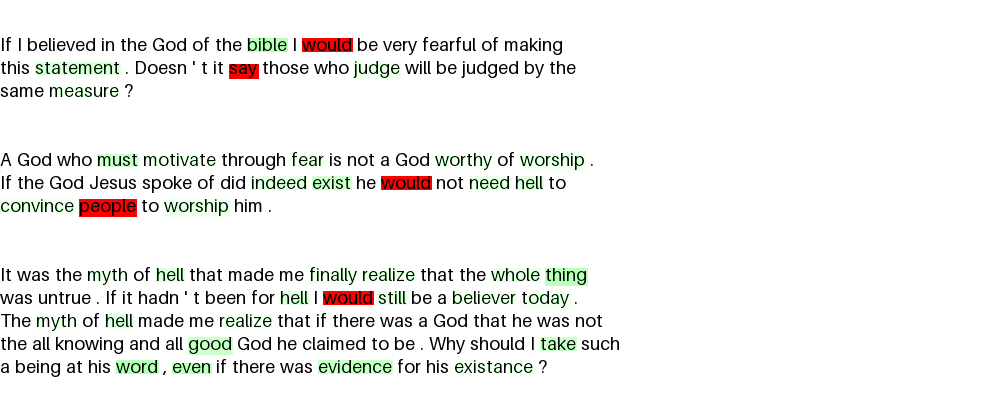

In [527]:
text = dataset.get_dataset().raw_text.loc['soc_religion_christian_20695']
dist = final_model.get_phi().loc['@lemmatized']['topic_1']
utils.compareTopWordsVsWeithedCoh(text, dist)

### Calculating interpretability

In [366]:
import json
f = open('chains.json')
chains = json.load(f)

In [389]:
%%time
score = chains_interpretability.ChainsConsistency(chains)

CPU times: user 28 µs, sys: 8 µs, total: 36 µs
Wall time: 49.4 µs


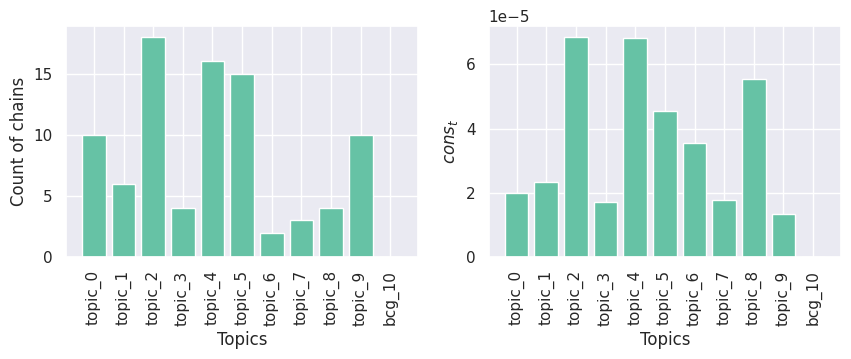

In [390]:
score.visualize(final_model)

In [536]:
TopTokensViewer(final_model).view_from_jupyter(one_topic_per_row=False)

topic_0 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 israel 
 1.597180 
 
 
 israeli 
 1.239570 
 
 
 pt 
 0.964060 
 
 
 arab 
 0.905150 
 
 
 medical 
 0.749430 
 
 
 health 
 0.716010 
 
 
 period 
 0.706520 
 
 
 patient 
 0.620480 
 
 
 disease 
 0.601600 
 
 
 la 
 0.522830 
 
 
 
 
 
 
 
   
   
 topic_1 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 god 
 1.086660 
 
 
 say 
 0.624720 
 
 
 one 
 0.559960 
 
 
 believe 
 0.475010 
 
 
 christian 
 0.466540 
 
 
 jesus 
 0.462150 
 
 
 people 
 0.459040 
 
 
 would 
 0.380030 
 
 
 think 
 0.371550 
 
 
 make 
 0.358100 
 
 
 
 
 
 
 
   
   
 topic_2 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 file 
 1.569760 
 
 
 window 
 1.130270 
 
 
 use 
 0.810960 
 
 
 program 
 0.784140 
 
 
 image 
 0.604690 
 
 
 version 
 0.518730 
 
 
 available 
 0.462480 
 
 
 server 
 0.431580 
 
 
 ftp 
 0.425780 
 
 
 display 
 0.414410 
 
 
 
 
 
 
 
   
   
 topic_3 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 armenian 
 0.969800 
 
 
 say 
 0.697430 
 
 
 go 
 0.544910 
 
 
 kill 
 0.527860 
 
 
 people 
 0.473020 
 
 
 war 
 0.428520 
 
 
 turkish 
 0.422120 
 
 
 one 
 0.369910 
 
 
 come 
 0.364710 
 
 
 u 
 0.329250 
 
 
 
 
 
 
 
   
   
 topic_4 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 drive 
 2.014710 
 
 
 card 
 1.292260 
 
 
 disk 
 0.968640 
 
 
 scsi 
 0.765980 
 
 
 driver 
 0.742010 
 
 
 mac 
 0.610620 
 
 
 system 
 0.595950 
 
 
 memory 
 0.549340 
 
 
 pc 
 0.535900 
 
 
 monitor 
 0.532200 
 
 
 
 
 
 
 
   
   
 topic_5 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 key 
 1.397820 
 
 
 space 
 1.007970 
 
 
 information 
 0.487230 
 
 
 encryption 
 0.482330 
 
 
 chip 
 0.441160 
 
 
 system 
 0.439150 
 
 
 data 
 0.436210 
 
 
 technology 
 0.433030 
 
 
 launch 
 0.370660 
 
 
 use 
 0.366990 
 
 
 
 
 
 
 
   
   
 topic_6 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 state 
 0.728680 
 
 
 people 
 0.714610 
 
 
 would 
 0.654870 
 
 
 government 
 0.599860 
 
 
 right 
 0.598490 
 
 
 law 
 0.591600 
 
 
 gun 
 0.577570 
 
 
 make 
 0.463140 
 
 
 mr 
 0.366150 
 
 
 think 
 0.346800 
 
 
 
 
 
 
 
   
   
 topic_7 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 db 
 1.722910 
 
 
 entry 
 1.559840 
 
 
 theory 
 0.620680 
 
 
 rule 
 0.557020 
 
 
 science 
 0.555910 
 
 
 buf 
 0.532240 
 
 
 posting 
 0.474020 
 
 
 section 
 0.445000 
 
 
 post 
 0.406600 
 
 
 bos 
 0.399840 
 
 
 
 
 
 
 
   
   
 topic_8 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 game 
 1.640310 
 
 
 team 
 1.175830 
 
 
 play 
 0.924230 
 
 
 player 
 0.742300 
 
 
 win 
 0.689380 
 
 
 year 
 0.684300 
 
 
 season 
 0.563100 
 
 
 hockey 
 0.430960 
 
 
 league 
 0.411030 
 
 
 stephanopoulos 
 0.400730 
 
 
 
 
 
 
 
   
   
 topic_9 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 car 
 0.853550 
 
 
 bike 
 0.365570 
 
 
 get 
 0.360470 
 
 
 power 
 0.289600 
 
 
 ground 
 0.286480 
 
 
 wire 
 0.279800 
 
 
 use 
 0.276850 
 
 
 good 
 0.274300 
 
 
 back 
 0.272050 
 
 
 much 
 0.268530 
 
 
 
 
 
 
 
   
   
 bcg_10 
 
 
 modality 
 token 
   
 
 
 
 
 @lemmatized 
 would 
 0.071770 
 
 
 get 
 0.071220 
 
 
 one 
 0.062480 
 
 
 know 
 0.052860 
 
 
 like 
 0.048400 
 
 
 use 
 0.044940 
 
 
 think 
 0.035740 
 
 
 go 
 0.027960 
 
 
 good 
 0.027790 
 
 
 anyone 
 0.027330

In [369]:
%%time
inter = score.call(final_model)

CPU times: user 1min 26s, sys: 36 s, total: 2min 2s
Wall time: 51.7 s


### Calculating coherence

#### Top words cohenrece

In [270]:
%%time
pmi_top10_score = coherence_metrics.NewmanCoherence(cooc.pmi, 10)
pmi_top10 = pmi_top10_score.call(final_model)

CPU times: user 15.3 s, sys: 4.61 s, total: 19.9 s
Wall time: 11.2 s


In [271]:
%%time
pmi_top20_score = coherence_metrics.NewmanCoherence(cooc.pmi, 20)
pmi_top20 = pmi_top20_score.call(final_model)

CPU times: user 20.7 s, sys: 445 ms, total: 21.2 s
Wall time: 11.6 s


In [272]:
%%time
pmi_top50_score = coherence_metrics.NewmanCoherence(cooc.pmi, 50)
pmi_top50 = pmi_top50_score.call(final_model)

CPU times: user 15.3 s, sys: 6.87 s, total: 22.2 s
Wall time: 12.1 s


In [273]:
%%time
pmi_top100_score = coherence_metrics.NewmanCoherence(cooc.pmi, 100)
pmi_top100 = pmi_top100_score.call(final_model)

CPU times: user 21.2 s, sys: 4.14 s, total: 25.3 s
Wall time: 13.2 s


#### $\phi_{ut} \phi_{vt}$

In [73]:
%%time
ppmi_mul_score = coherence_metrics.CustomRelCoherence(lambda x, y : x * y,  cooc.ppmi)
ppmi_mul = ppmi_mul_score.call(final_model)

CPU times: user 24min 53s, sys: 6min 33s, total: 31min 26s
Wall time: 16min 23s


In [79]:
%%time
npmi_mul_score = coherence_metrics.CustomRelCoherence(lambda x, y : x * y,  cooc.npmi)
npmi_mul = npmi_mul_score.call(final_model)

CPU times: user 27min 22s, sys: 7min 34s, total: 34min 56s
Wall time: 17min 48s


In [80]:
%%time
pmi_mul_score = coherence_metrics.CustomRelCoherence(lambda x, y : x * y,  cooc.pmi)
pmi_mul = pmi_mul_score.call(final_model)

CPU times: user 23min 18s, sys: 5min 55s, total: 29min 13s
Wall time: 15min 40s


In [81]:
%%time
pmi2_mul_score = coherence_metrics.CustomRelCoherence(lambda x, y : x * y,  cooc.pmi2)
pmi2_mul = pmi2_mul_score.call(final_model)

CPU times: user 26min 33s, sys: 7min 14s, total: 33min 48s
Wall time: 17min 23s


In [82]:
%%time
pmi3_mul_score = coherence_metrics.CustomRelCoherence(lambda x, y : x * y,  cooc.pmi3)
pmi3_mul = pmi3_mul_score.call(final_model)

CPU times: user 19min 25s, sys: 4min 40s, total: 24min 5s
Wall time: 13min 27s


#### $\sqrt{\phi_{ut} \phi_{vt}}$

In [100]:
%%time
pmi_geom_score = coherence_metrics.CustomRelCoherence(lambda x, y : math.sqrt(x * y),  cooc.pmi)
pmi_geom = pmi_geom_score.call(final_model)

CPU times: user 28min 8s, sys: 7min 50s, total: 35min 59s
Wall time: 19min 10s


In [101]:
%%time
ppmi_geom_score = coherence_metrics.CustomRelCoherence(lambda x, y : math.sqrt(x * y),  cooc.ppmi)
ppmi_geom = ppmi_geom_score.call(final_model)

CPU times: user 33min 54s, sys: 10min 14s, total: 44min 8s
Wall time: 22min 20s


In [120]:
%%time
npmi_geom_score = coherence_metrics.CustomRelCoherence(lambda x, y : math.sqrt(x * y),  cooc.npmi)
npmi_geom = npmi_geom_score.call(final_model)

CPU times: user 23min, sys: 6min 7s, total: 29min 7s
Wall time: 16min 20s


In [103]:
%%time
pmi2_geom_score = coherence_metrics.CustomRelCoherence(lambda x, y : math.sqrt(x * y),  cooc.pmi2)
pmi2_geom = pmi2_geom_score.call(final_model)

CPU times: user 25min 15s, sys: 6min 54s, total: 32min 9s
Wall time: 17min 31s


In [104]:
%%time
pmi3_geom_score = coherence_metrics.CustomRelCoherence(lambda x, y : math.sqrt(x * y),  cooc.pmi3)
pmi3_geom = pmi3_geom_score.call(final_model)

CPU times: user 22min 49s, sys: 5min 51s, total: 28min 41s
Wall time: 16min 12s


#### $(\phi_{ut} + \phi_{vt})[\phi_{ut} > 0] [\phi_{vt} > 0]$

In [105]:
%%time
pmi_sum_score = coherence_metrics.CustomRelCoherence(lambda x, y : (x + y) * (x > 0) * (y > 0),  cooc.pmi)
pmi_sum = pmi_sum_score.call(final_model)

CPU times: user 31min 10s, sys: 8min 47s, total: 39min 57s
Wall time: 21min 17s


In [106]:
%%time
ppmi_sum_score = coherence_metrics.CustomRelCoherence(lambda x, y : (x + y) * (x > 0) * (y > 0),  cooc.ppmi)
ppmi_sum = ppmi_sum_score.call(final_model)

CPU times: user 26min 16s, sys: 6min 57s, total: 33min 14s
Wall time: 18min 31s


In [121]:
%%time
npmi_sum_score = coherence_metrics.CustomRelCoherence(lambda x, y : (x + y) * (x > 0) * (y > 0),  cooc.npmi)
npmi_sum = npmi_sum_score.call(final_model)

CPU times: user 26min 31s, sys: 7min 14s, total: 33min 45s
Wall time: 18min 43s


In [108]:
%%time
pmi2_sum_score = coherence_metrics.CustomRelCoherence(lambda x, y : (x + y) * (x > 0) * (y > 0),  cooc.pmi2)
pmi2_sum = pmi2_sum_score.call(final_model)

CPU times: user 29min 27s, sys: 8min 14s, total: 37min 41s
Wall time: 20min 27s


In [109]:
%%time
pmi3_sum_score = coherence_metrics.CustomRelCoherence(lambda x, y : (x + y) * (x > 0) * (y > 0),  cooc.pmi3)
pmi3_sum = pmi3_sum_score.call(final_model)

CPU times: user 26min 49s, sys: 7min 5s, total: 33min 55s
Wall time: 18min 58s


#### $[\phi_{ut}  \phi_{vt} \ge \varepsilon]$

Let's take $\varepsilon = \frac {1} {{\vert W \vert }^2}$ 

In [110]:
W = final_model.get_phi().loc['@lemmatized'].shape[0]
eps = W ** (-2)

In [111]:
%%time
pmi_indmul_score = coherence_metrics.CustomRelCoherence(lambda x, y : x * y >= eps,  cooc.pmi)
pmi_indmul = pmi_indmul_score.call(final_model)

CPU times: user 11min 57s, sys: 4min 2s, total: 15min 59s
Wall time: 7min 36s


In [112]:
%%time
ppmi_indmul_score = coherence_metrics.CustomRelCoherence(lambda x, y : x * y >= eps,  cooc.ppmi)
ppmi_indmul = ppmi_indmul_score.call(final_model)

CPU times: user 11min 58s, sys: 4min 6s, total: 16min 4s
Wall time: 7min 35s


In [113]:
%%time
npmi_indmul_score = coherence_metrics.CustomRelCoherence(lambda x, y : x * y >= eps,  cooc.npmi)
npmi_indmul = npmi_indmul_score.call(final_model)

CPU times: user 9min 22s, sys: 2min 53s, total: 12min 16s
Wall time: 6min 17s


In [114]:
%%time
pmi2_indmul_score = coherence_metrics.CustomRelCoherence(lambda x, y : x * y >= eps,  cooc.pmi2)
pmi2_indmul = pmi2_indmul_score.call(final_model)

CPU times: user 9min, sys: 2min 43s, total: 11min 44s
Wall time: 6min 4s


In [115]:
%%time
pmi3_indmul_score = coherence_metrics.CustomRelCoherence(lambda x, y : x * y >= eps,  cooc.pmi3)
pmi3_indmul = pmi3_indmul_score.call(final_model)

CPU times: user 7min 59s, sys: 2min 16s, total: 10min 16s
Wall time: 5min 31s


In [177]:
inter

array([-18.40047073, -19.5382328 , -16.94548035, -26.7927742 ,
       -17.81483459, -17.33803177, -11.61606979,         -inf,
       -18.24100876, -20.45960808, -27.90028381])

In [248]:
import importlib
importlib.reload(coherence_metrics)
importlib.reload(chains_interpretability)
importlib.reload(utils)

<module 'utils' from '/home/linuxuser0x32/Documents/M1P/experiment/utils.py'>

In [249]:
import coherence_metrics 
import chains_interpretability
import utils

### Results

In [274]:
del ms

In [355]:
ms = utils.MetricsStorage()
# decomment string below to load metrics from json, if u dont want to rerun experiment
# newMs.loadJson("sample.json") 

In [356]:
ms.add('Newman_10', pmi_top10)
ms.add('Newman_20', pmi_top20)
ms.add('Newman_50', pmi_top50)
ms.add('Newman_100', pmi_top100)
ms.add(r'$PPMI, \phi_u \phi_v$', ppmi_mul)
ms.add(r'$PMI, \phi_u \phi_v$', pmi_mul)
ms.add(r'$NPMI, \phi_u \phi_v$', npmi_mul)
ms.add(r'$PMI2, \phi_u \phi_v$', pmi2_mul)
ms.add(r'$PMI3, \phi_u \phi_v$', pmi3_mul)
ms.add(r'$PPMI, \sqrt{\phi_u \phi_v}$', ppmi_geom)
ms.add(r'$PMI, \sqrt{\phi_u \phi_v}$', pmi_geom)
ms.add(r'$NPMI, \sqrt{\phi_u \phi_v}$', npmi_geom)
ms.add(r'$PMI2, \sqrt{\phi_u \phi_v}$', pmi2_geom)
ms.add(r'$PMI3, \sqrt{\phi_u \phi_v}$', pmi3_geom)
ms.add(r'$PPMI, [\phi_u > 0][\phi_v > 0] (\phi_u + \phi_v)$', ppmi_sum)
ms.add(r'$PMI, [\phi_u > 0][\phi_v > 0] (\phi_u + \phi_v)$', pmi_sum)
ms.add(r'$NPMI, [\phi_u > 0][\phi_v > 0] (\phi_u + \phi_v)$', npmi_sum)
ms.add(r'$PMI2, [\phi_u > 0][\phi_v > 0] (\phi_u + \phi_v)$', pmi2_sum)
ms.add(r'$PMI3, [\phi_u > 0][\phi_v > 0] (\phi_u + \phi_v)$', pmi3_sum)
ms.add(r'$PPMI, [\phi_u \phi_v] > \varepsilon$', ppmi_indmul)
ms.add(r'$PMI, [\phi_u \phi_v] > \varepsilon$', pmi_indmul)
ms.add(r'$NPMI, [\phi_u \phi_v] > \varepsilon$', npmi_indmul)
ms.add(r'$PMI2, [\phi_u \phi_v] > \varepsilon$', pmi2_indmul)
ms.add(r'$PMI3, [\phi_u \phi_v] > \varepsilon$', pmi3_indmul)


In [357]:
ms.getCorrelationTable(inter[:10])

,metric,correlation coef
0,Newman_10,0.62
1,Newman_20,0.49
2,Newman_50,0.28
3,Newman_100,0.38
4,"$PPMI, \phi_u \phi_v$",0.88
5,"$PMI, \phi_u \phi_v$",0.52
6,"$NPMI, \phi_u \phi_v$",-0.52
7,"$PMI2, \phi_u \phi_v$",-0.27
8,"$PMI3, \phi_u \phi_v$",-0.27
9,"$PPMI, \sqrt{\phi_u \phi_v}$",0.42


Text(0, 0.5, 'Spearman correlation')

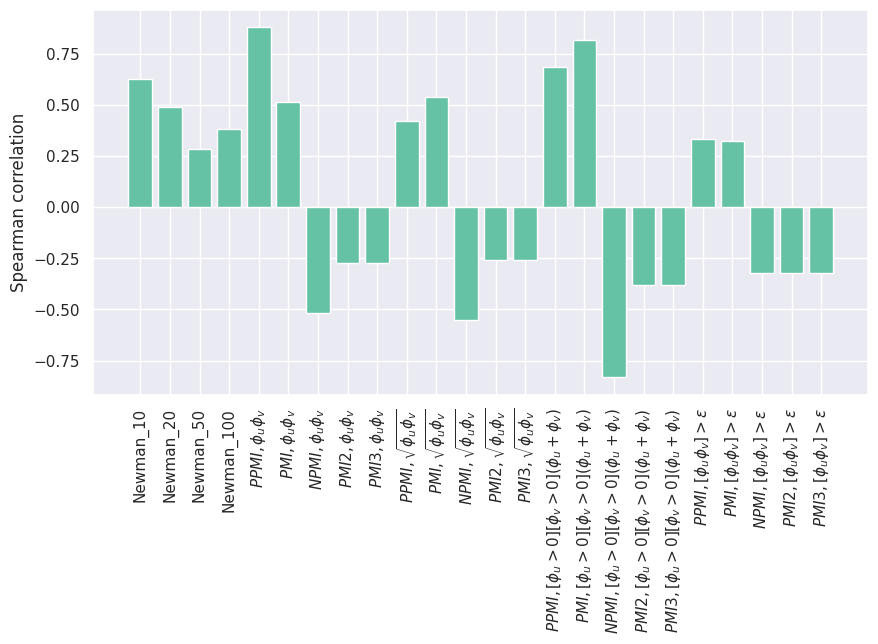

In [358]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(*ms.getCorrelationList(inter[:10]))
plt.ylabel('Spearman correlation')

In [279]:
ms.dumpJson("metrics.json")